# Resume Screening Machine Learning Project
## In this project we'll build and train a ML model on dataset of resumes and predict the category of the resume into one of the 24 categories
## After training the model it will help in automatically classifying resumes to their corresponding categories
## Dataset downloaded from: <a src=https://www.kaggle.com/dhainjeamita/updatedresumedataset/download>Dataset Link</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataset = pd.read_csv("UpdatedResumeDataSet.csv", encoding="utf-8")
resumeDataset["cleaned_resume"] = ""
resumeDataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


## Exploratory Data Analysis

Now let’s have a look at the distinct categories of resumes:

In [2]:
print("Distinct categories of resumes:")
print(resumeDataset["Category"].unique())

Distinct categories of resumes:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


Now let’s have a look at the distinct categories of resume and the number of records belonging to each category:

In [3]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataset["Category"].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Blockchain                   40
Mechanical Engineer          40
Data Science                 40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


Now let’s visualize the number of categories in the dataset:

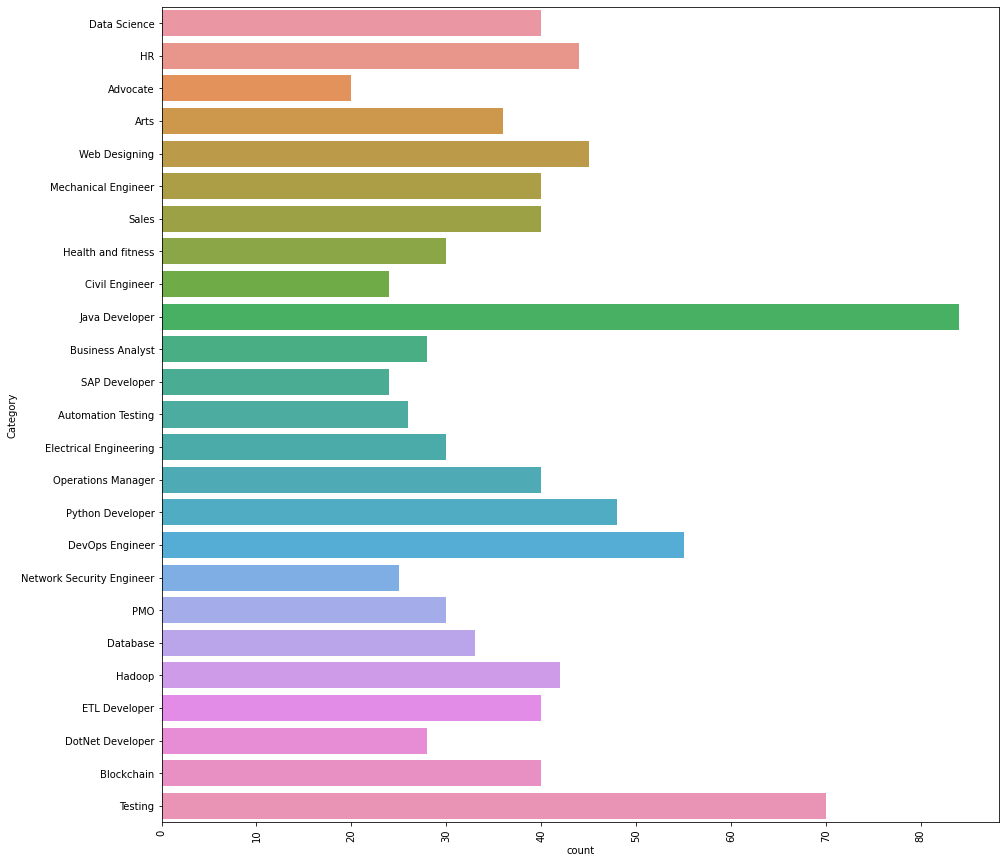

In [4]:
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataset);

Now let’s visualize the distribution of categories:

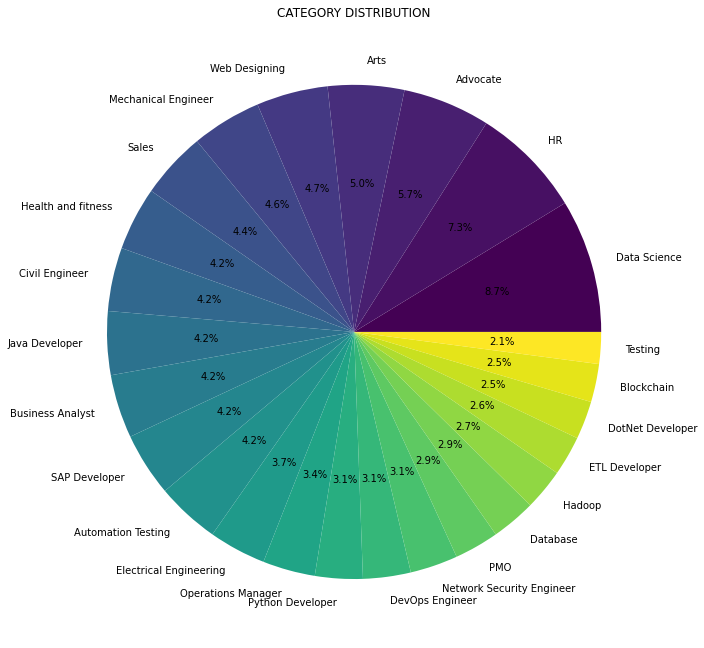

In [5]:
from matplotlib.gridspec import GridSpec
targetCnts = resumeDataset["Category"].value_counts()
targetLabels = resumeDataset["Category"].unique()

# Create axes and square fig
fig = plt.figure(1, figsize=(25, 25))
fig.patch.set_facecolor('white')
grid = GridSpec(2, 2)

cmap = plt.get_cmap("viridis")
colors = [cmap(i) for i in np.linspace(0, 1, 25)]
plt.subplot(grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

pieChart = plt.pie(targetCnts, labels=targetLabels, autopct="%1.1f%%", 
                colors=colors)
plt.show()

### Preprocess resume texts

Create a helper function to remove URLs, hashtags, mentions, special letters, and punctuations

In [6]:
import re

def cleanResumeText(resumeText):
    """Cleans the text in resume by removing URLs, hashtags, special letters,
    and punctuations

    Args:
        resumeText (str): The text string to clean

    Returns:
        str: Cleaned resume text
    """

    resumeText = re.sub("http\S+\s*", " ", resumeText)  # Remove URLs
    resumeText = re.sub("RT|cc", " ", resumeText)  # Remove RT and cc
    resumeText = re.sub("#\S+", "", resumeText)  # Remove hashtags
    resumeText = re.sub("@\S+", "  ", resumeText)  # Remove mentions
    resumeText = re.sub("[%s]" % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),
                         " ", resumeText)  # Remove punctuations
    resumeText = re.sub(r"[^\x00-\x7f]", " ", resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # Remove extra whitespace
    return resumeText

resumeDataset["cleaned_resume"] = resumeDataset["Resume"].apply(lambda x: cleanResumeText(x))

Now the next task is to have a look at the Wordcloud. A Wordcloud represents the most numbers of words larger and vice versa:

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


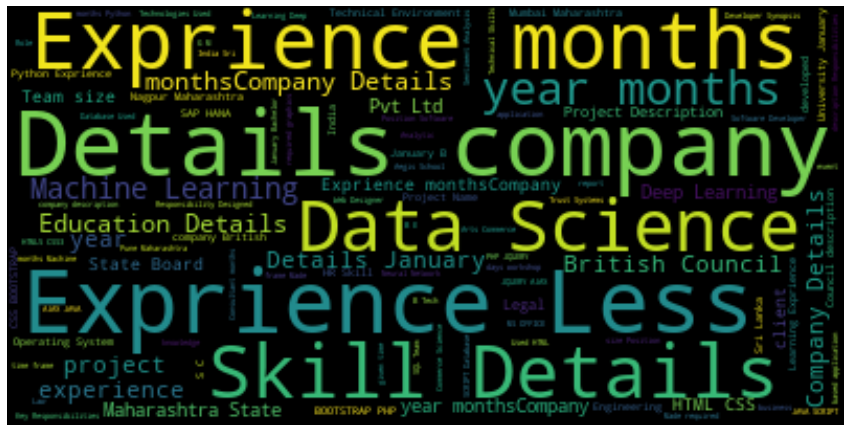

In [7]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwordsSet = set(stopwords.words("english") + ["``", "''"])
totalWords = []
sentences = resumeDataset["Resume"].values
cleanedSentences = ""

for i in range(160):
    cleanedText = cleanResumeText(sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in stopwordsSet and word not in string.punctuation:
            totalWords.append(word)

# Get top 50 most common words in the dataset
wordFrequencies = nltk.FreqDist(totalWords)
mostCommon = wordFrequencies.most_common(50)
print(mostCommon)

wcloud = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Convert the words into categorical values:

In [8]:
from sklearn.preprocessing import LabelEncoder

to_encode = ["Category"]
le = LabelEncoder()

for column in to_encode:
    resumeDataset[column] = le.fit_transform(resumeDataset[column])

## Training Machine Learning Model for Resume Screening

Here we will use OneVsRestClassifier with KNeighborsClassifier as our model. First we will split the data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

textData = resumeDataset["cleaned_resume"].values
y = resumeDataset["Category"].values

vectorizer = TfidfVectorizer(
    sublinear_tf=True, 
    stop_words="english") 
    # max_features=1500)

X = vectorizer.fit_transform(textData)  # Word TF-IDF features

print("Features computed...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Features computed...
Training data shape: (769, 7351)
Testing data shape: (193, 7351)


### Train the model and print classification report

In [10]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

print(f"Accuracy of KNN Classifier on training set: {clf.score(X_train, y_train)}")
print(f"Accuracy of KNN Classifier on test set: {clf.score(X_test, y_test)}")

print("\nClassification report for KNN Classifier:")
print("\n", metrics.classification_report(y_test, preds), "\n")

Accuracy of KNN Classifier on training set: 0.9804941482444733
Accuracy of KNN Classifier on test set: 0.9792746113989638

Classification report for KNN Classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       0.75      0.60      0.67         5
           7       1.00      0.88      0.93         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.0

## Save the model and label encodings

In [11]:
import pickle

with open("onevrest_knn_model.pkl", "wb") as modelFile:
    pickle.dump(clf, modelFile)

with open("onevrest_knn_labelencoder.pkl", "wb") as labelEncoderFile:
    pickle.dump(le, labelEncoderFile)

with open("onevrest_knn_tfidfvectorizer.pkl", "wb") as tfidfvectorizerFile:
    pickle.dump(vectorizer, tfidfvectorizerFile)

print("Model, Vectorizer and Label Encoder saved.")

Model, Vectorizer and Label Encoder saved.
